In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/rashida048/Some-NLP-Projects/master/movie_dataset.csv"
df = pd.read_csv(url)

# Step 2: Preprocess the data
features = ['keywords', 'cast', 'genres', 'director']

for feature in features:
    df[feature] = df[feature].fillna('')

# Combine features into a single string
def combine_features(row):
    return row['keywords'] + " " + row['cast'] + " " + row['genres'] + " " + row['director']

df['combined_features'] = df.apply(combine_features, axis=1)

# Step 3: Create a user-item matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Step 4: Implement a similarity metric
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Step 5: Recommend movies based on similarity
def recommend_movies(movie_title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = df[df['title'] == movie_title].index[0]

    # Get pairwise similarity scores with all movies
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get top 10 similar movies
    sim_scores = sim_scores[1:11]

    # Get movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return top 10 recommended movies
    return df['title'].iloc[movie_indices]

# Example usage:
movie_title = "Avatar"
recommended_movies = recommend_movies(movie_title)
print("Recommended Movies for", movie_title, ":")
print(recommended_movies)

Recommended Movies for Avatar :
94      Guardians of the Galaxy
2403                     Aliens
3158                      Alien
47      Star Trek Into Darkness
1053               Galaxy Quest
56             Star Trek Beyond
838                      Alien³
239                     Gravity
2696                    Jason X
3730                      Cargo
Name: title, dtype: object


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

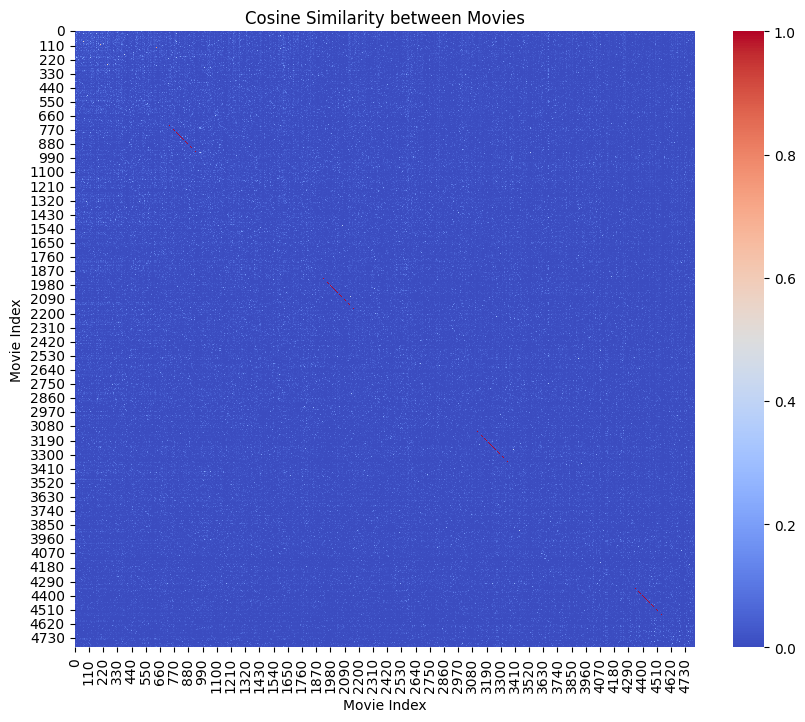

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim, annot=False, cmap='coolwarm')
plt.title('Cosine Similarity between Movies')
plt.xlabel('Movie Index')
plt.ylabel('Movie Index')
plt.show()